In [2]:
#IMPORTS

import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as kr
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import os
import csv

from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

from time import sleep
from tqdm import tqdm

import copy
import numpy
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from numpy.random import RandomState
import scipy as scp
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import to_categorical
from keras import backend as K
from itertools import product
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn import mixture

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import drive if you are using google colab

# from google.colab import drive
# drive.mount('/content/drive/')

In [4]:
# Read the Synthetic identity dataset in the dataframe

# if you are using google colab
# data = pd.read_csv('drive/MyDrive/labeled_gen_database_2.csv')

# if you are running locally
data = pd.read_csv('labeled_gen_database_2.csv')
data.head()

,Unnamed: 0,Name,DoB,Mobile,Email,Location,label
0,0,Misha Kumer,1972-04-18,9038740424,rohanhalder@hotmail.com,h no 19 agrawal circle hapur 968267\n,0
1,1,Jayesh Krishnan,1950-05-08,6646120647,sara93@gmail.com,h no 74 hora nagar bhilai 879957\n \n,0
2,2,Suhana Mall,1931-11-07,7249906782,hguha@hotmail.com,00 698 tata chowk bhusawal 537818\n,0
3,3,Drishya Mangat,2012-06-19,8095808991,fseth@gmail.com,816 dora coimbatore 986675\n,0
4,4,Rati Bahl,1971-03-20,6005627215,dsahni@gmail.com,49 shanker ganj pali 316971,0


0    50000
1     2500
Name: label, dtype: int64

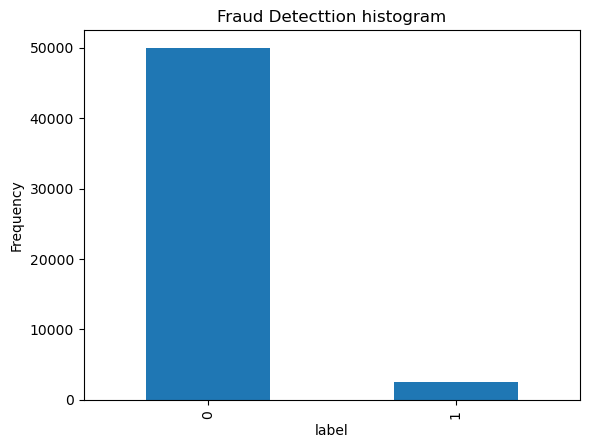

In [5]:
#print the lebels in the histogram to see frequecy
pd.value_counts(data['label']).plot.bar()
plt.title('Fraud Detecttion histogram')
plt.xlabel('label')
plt.ylabel('Frequency')
data['label'].value_counts()

In [6]:
import re
# Remove punctuation and apply case folding
def preprocessor(text):
    text = re.sub('<[^>]*>', '', str(text).lower())
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' .join(emoticons).replace('-', ''))

    return text

In [7]:
# apply the preprocessor to all columns

data['Name'] = data['Name'].apply(preprocessor)
data['DoB'] = data['DoB'].apply(preprocessor)
data['Mobile'] = data['Mobile'].apply(preprocessor)
data['Email'] = data['Email'].apply(preprocessor)
data['Location'] = data['Location'].apply(preprocessor)

data.head()

,Unnamed: 0,Name,DoB,Mobile,Email,Location,label
0,0,misha kumer,1972 04 18,9038740424,rohanhalder hotmail com,h no 19 agrawal circle hapur 968267,0
1,1,jayesh krishnan,1950 05 08,6646120647,sara93 gmail com,h no 74 hora nagar bhilai 879957,0
2,2,suhana mall,1931 11 07,7249906782,hguha hotmail com,00 698 tata chowk bhusawal 537818,0
3,3,drishya mangat,2012 06 19,8095808991,fseth gmail com,816 dora coimbatore 986675,0
4,4,rati bahl,1971 03 20,6005627215,dsahni gmail com,49 shanker ganj pali 316971,0


In [8]:
#to get the shape of the data
X = np.array(data.loc[:, data.columns != 'label'])
y = np.array(data.loc[:, data.columns == 'label'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
X

Shape of X: (52500, 6)
Shape of y: (52500, 1)


array([[0, 'misha kumer', '1972 04 18', '9038740424',
        'rohanhalder hotmail com',
        'h no 19 agrawal circle hapur 968267 '],
       [1, 'jayesh krishnan', '1950 05 08', '6646120647',
        'sara93 gmail com', 'h no 74 hora nagar bhilai 879957 '],
       [2, 'suhana mall', '1931 11 07', '7249906782',
        'hguha hotmail com', '00 698 tata chowk bhusawal 537818 '],
       ...,
       [52497, 'nakul sane', '1947 01 07', '6439463054',
        'sahilranganathan hotmail com',
        '01 889 gopal street tadepalligudem 004421 '],
       [52498, 'riya khalsa', '2020 08 17', '7019102981',
        'ladarnav gmail com', '80 659 chhabra chowk kolhapur 921139 '],
       [52499, 'kabir kar', '1914 09 24', '7024039270',
        'dadauthkarsh yahoo com',
        'h no 87 tripathi nagar raebareli 678392 ']], dtype=object)

In [9]:
#feature selection
X_f = data['Name'] + ' ' + data['DoB'] + ' ' + data['Mobile'] + ' ' +  data['Email'] + ' ' + data['Location']
X_f

0        misha kumer 1972 04 18 9038740424 rohanhalder ...
1        jayesh krishnan 1950 05 08 6646120647 sara93 g...
2        suhana mall 1931 11 07 7249906782 hguha hotmai...
3        drishya mangat 2012 06 19 8095808991 fseth gma...
4        rati bahl 1971 03 20 6005627215 dsahni gmail c...
                               ...                        
52495    umang goda 1932 11 12 9279149821 borajayesh gm...
52496    zaina raja 1955 09 05 9803889919 upadhyayneelo...
52497    nakul sane 1947 01 07 6439463054 sahilranganat...
52498    riya khalsa 2020 08 17 7019102981 ladarnav gma...
52499    kabir kar 1914 09 24 7024039270 dadauthkarsh y...
Length: 52500, dtype: object

In [10]:
print(X_f.shape)

(52500,)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorization of the selected features
tfidf_vectorizer = TfidfVectorizer(analyzer= 'word', stop_words = 'english')
vectorized_df= tfidf_vectorizer.fit_transform(X_f)
print(vectorized_df.shape[1])
print(vectorized_df.dtype)
print(type(vectorized_df))

# Name 172255, 813

141142
float64
<class 'scipy.sparse._csr.csr_matrix'>


In [12]:
from sklearn.decomposition import TruncatedSVD

# decomposition of vectorized features
pca = TruncatedSVD(n_components=512)                                
X = pca.fit_transform(vectorized_df)

print(X.shape)
X

(52500, 512)


array([[ 0.10797838, -0.04788859, -0.04767071, ...,  0.00448879,
         0.00576733, -0.00668182],
       [ 0.10942514, -0.0146338 ,  0.06419551, ...,  0.02428988,
        -0.00584481, -0.01227844],
       [ 0.10312697, -0.04747218, -0.03865732, ..., -0.01036638,
        -0.01103898, -0.02641627],
       ...,
       [ 0.11889374, -0.05920984, -0.03558851, ..., -0.02223892,
        -0.00346919,  0.02524317],
       [ 0.09726332, -0.00695794,  0.06186589, ...,  0.00643809,
         0.00342048,  0.01259548],
       [ 0.10352896,  0.06846897, -0.02596683, ...,  0.02603586,
         0.00894433,  0.00164218]])

# Smote for oversampling

In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

# Smote is used to deal with the oversmapling 
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote==0)))

Before OverSampling, counts of label '1': [2500]
Before OverSampling, counts of label '0': [50000] 

After OverSampling, the shape of train_X: (100000, 512)
After OverSampling, the shape of train_y: (100000,) 

After OverSampling, counts of label '1': 50000
After OverSampling, counts of label '0': 50000


In [14]:
from sklearn.utils import shuffle

# Shuffling samples
X_smote, y_smote = shuffle(X_smote, y_smote)
print(y_smote[0:100])

[1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1]


In [15]:
#split the data in test and train in 30:70 ration and thier shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
Features_number = len(X_train[0])

print("Number of identities X_train dataset: ", X_train.shape)
print("Number of identities y_train dataset: ", y_train.shape)
print("Number of identities X_test dataset: ", X_test.shape)
print("Number of identities y_test dataset: ", y_test.shape)
Features_number

Number of identities X_train dataset:  (36750, 512)
Number of identities y_train dataset:  (36750, 1)
Number of identities X_test dataset:  (15750, 512)
Number of identities y_test dataset:  (15750, 1)


512

In [16]:
#split the smote data in test and train in 30:70 ration and thier shape
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.30, random_state=0)
Features_number = len(X_train_smote[0])

print("Number of identities X_train dataset: ", X_train_smote.shape)
print("Number of identities y_train dataset: ", y_train_smote.shape)
print("Number of identities X_test dataset: ", X_test_smote.shape)
print("Number of identities y_test dataset: ", y_test_smote.shape)
Features_number

Number of identities X_train dataset:  (70000, 512)
Number of identities y_train dataset:  (70000,)
Number of identities X_test dataset:  (30000, 512)
Number of identities y_test dataset:  (30000,)


512

In [17]:
# Neural Network Model

from keras.layers import Dropout
earlystopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0.01,
                              patience = 50,
                              verbose = 1,
                              baseline = 2,
                              restore_best_weights = True)

 
    
model = Sequential()
model.add(Dense(70, input_dim=Features_number, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_smote, y_train_smote, batch_size = 32, epochs=1, validation_data=(X_test_smote, y_test_smote), callbacks = [earlystopping], shuffle=True)


2188/2188 [==============================] - 13s 4ms/step - loss: 0.3280 - accuracy: 0.8483 - val_loss: 0.1484 - val_accuracy: 0.9438


In [18]:
#AUXILIARY METHODS FOR FEDERATED LEARNING

# RETURN INDICES TO LAYERS WITH WEIGHTS AND BIASES
def trainable_layers(model):
    return [i for i, layer in enumerate(model.layers) if len(layer.get_weights()) > 0]

# RETURN WEIGHTS AND BIASES OF A MODEL
def get_parameters(model):
    weights = []
    biases = []
    index = trainable_layers(model)
    for i in index:
        weights.append(copy.deepcopy(model.layers[i].get_weights()[0]))
        biases.append(copy.deepcopy(model.layers[i].get_weights()[1]))           
    
    return weights, biases
        
# SET WEIGHTS AND BIASES OF A MODEL
def set_parameters(model, weights, biases):
    index = trainable_layers(model)
    for i, j in enumerate(index):
        model.layers[j].set_weights([weights[i], biases[i]])
    
# DEPRECATED: RETURN THE GRADIENTS OF THE MODEL AFTER AN UPDATE 
def get_gradients(model, inputs, outputs):
    """ Gets gradient of model for given inputs and outputs for all weights"""
    grads = model.optimizer.get_gradients(model.total_loss, model.trainable_weights)
    symb_inputs = (model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    f = K.function(symb_inputs, grads)
    x, y, sample_weight = model._standardize_user_data(inputs, outputs)
    output_grad = f(x + y + sample_weight)
    
    w_grad = [w for i,w in enumerate(output_grad) if i%2==0]
    b_grad = [w for i,w in enumerate(output_grad) if i%2==1]
    
    return w_grad, b_grad

# RETURN THE DIFFERENCE OF MODELS' WEIGHTS AND BIASES AFTER AN UPDATE 
# NOTE: LEARNING RATE IS APPLIED, SO THE UPDATE IS DIFFERENT FROM THE
# GRADIENTS. IN CASE VANILLA SGD IS USED, THE GRADIENTS ARE OBTAINED
# AS (UPDATES / LEARNING_RATE)
def get_updates(model, inputs, outputs, batch_size, epochs):
    w, b = get_parameters(model)
    #model.train_on_batch(inputs, outputs)
    model.fit(inputs, outputs, batch_size=batch_size, epochs=epochs, verbose=0)
    w_new, b_new = get_parameters(model)
    
    weight_updates = [old - new for old,new in zip(w, w_new)]
    bias_updates = [old - new for old,new in zip(b, b_new)]
    
    return weight_updates, bias_updates

# UPDATE THE MODEL'S WEIGHTS AND PARAMETERS WITH AN UPDATE
def apply_updates(model, eta, w_new, b_new):
    w, b = get_parameters(model)
    new_weights = [theta - eta*delta for theta,delta in zip(w, w_new)]
    new_biases = [theta - eta*delta for theta,delta in zip(b, b_new)]
    set_parameters(model, new_weights, new_biases)
    
# FEDERATED AGGREGATION FUNCTION
def aggregate(n_layers, n_peers, f, w_updates, b_updates):
    agg_w = [f([w_updates[j][i] for j in range(n_peers)], axis=0) for i in range(n_layers)]
    agg_b = [f([b_updates[j][i] for j in range(n_peers)], axis=0) for i in range(n_layers)]
    return agg_w, agg_b

# SOLVE NANS
def nans_to_zero(W, B):
    W0 = [np.nan_to_num(w, nan=0.0, posinf=0.0, neginf=0.0) for w in W]
    B0 = [np.nan_to_num(b, nan=0.0, posinf=0.0, neginf=0.0) for b in B]
    return W0, B0

def build_forest(X,y):
    clf=RandomForestClassifier(n_estimators=10, max_depth=7, random_state=0, verbose = 1)
    clf.fit(X,y)
    return clf

# COMPUTE EUCLIDEAN DISTANCE OF WEIGHTS
def dist_weights(w_a, w_b):
    wf_a = flatten_weights(w_a)
    wf_b = flatten_weights(w_b)
    return euclidean(wf_a, wf_b)

# TRANSFORM ALL WEIGHT TENSORS TO 1D ARRAY
def flatten_weights(w_in):
    h = w_in[0].reshape(-1)
    for w in w_in[1:]:
        h = np.append(h, w.reshape(-1))
    return h
    

In [19]:
trainable_layers(model)

[0, 1, 2, 3]

In [20]:
get_parameters(model)

([array([[-0.0442228 ,  0.06157752, -0.09361991, ..., -0.01399065,
           0.05739889, -0.11180975],
         [-0.08401206,  0.0505331 ,  0.00855389, ..., -0.09795727,
          -0.05561826, -0.11204659],
         [ 0.02087241, -0.04364172, -0.10170597, ...,  0.0717571 ,
          -0.00801014,  0.05165558],
         ...,
         [-0.06987747, -0.05049299,  0.03024662, ..., -0.12425986,
          -0.10809799,  0.16087843],
         [ 0.09563079, -0.06995827,  0.09715676, ...,  0.20474434,
          -0.04037962, -0.15051052],
         [ 0.14667854,  0.008552  ,  0.10728872, ...,  0.14551114,
          -0.08330379,  0.17321908]], dtype=float32),
  array([[-0.16773638,  0.11132768,  0.00386014, ..., -0.2288544 ,
           0.25024325, -0.01725454],
         [-0.05402733,  0.1954115 , -0.08321574, ...,  0.19512436,
          -0.14454737,  0.16309462],
         [-0.17038752,  0.02848441,  0.20004974, ..., -0.21503161,
           0.3422651 , -0.19160703],
         ...,
         [ 0.047939

In [21]:
get_updates(model, X_train_smote, y_train_smote, 32, 2)

([array([[ 0.06104771,  0.00342738,  0.07501144, ...,  0.05558211,
           0.05172539,  0.05466112],
         [ 0.04969268,  0.01692363, -0.02600608, ...,  0.10569124,
           0.01258921, -0.02744748],
         [-0.01097862, -0.13307817,  0.05194344, ..., -0.02055372,
          -0.09518318, -0.02751334],
         ...,
         [-0.01782532, -0.00413116, -0.07326489, ...,  0.01848459,
           0.0262746 ,  0.01238742],
         [ 0.04234572,  0.0119901 , -0.00911968, ..., -0.1009303 ,
           0.02171439, -0.03071456],
         [ 0.02736982,  0.02622937, -0.03914364, ..., -0.01451501,
           0.11554578, -0.00879726]], dtype=float32),
  array([[-2.2404835e-02, -1.0084334e-01, -4.9966037e-02, ...,
           2.2580281e-02, -4.8929423e-02,  3.1949311e-02],
         [ 1.9594826e-02, -4.0786430e-02, -1.2457058e-02, ...,
          -7.7687949e-03, -3.2899678e-03, -1.6107053e-02],
         [ 4.1897237e-02, -1.4302934e-02, -4.0865690e-03, ...,
           2.3449481e-02, -4.6616793e-

In [22]:
W = get_parameters(model)[0]
B = get_parameters(model)[1]

## Federated Learning

In [23]:
# Metrics to store final results for different no of clients
results = {}

In [37]:
# Federated Learning Model

# Number of clients according to what we need
n_clients=5
ss = int(len(X_train_smote)/n_clients)
inputs_in = X_train_smote[0*ss:0*ss+ss]
outputs_in = y_train_smote[0*ss:0*ss+ss]

def build_model(X_t, y_t):
    model = Sequential()
    model.add(Dense(70, input_dim=Features_number, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [38]:
# Model Design
display(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                35910     
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 42,061
Trainable params: 42,061
Non-trainable params: 0
_________________________________________________________________


None

In [39]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_smote, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs,axis=1)
#yhat_probs
yhat_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
np.argmax(model.predict(X_test_smote), axis=0)

938/938 [==============================] - 2s 980us/step


array([12702], dtype=int64)

In [41]:
# Percentage and number of clients participating at each global training epoch
percentage_participants = 1.0
n_participants = int(n_clients * percentage_participants)

# Number of global training epochs
n_rounds = 50

# Number of local training epochs per global training epoch
n_local_rounds = 5

# Local batch size
local_batch_size = 32

# Local learning rate
local_lr = 0.001

# Global learning rate or 'gain'
model_substitution_rate = 1.0


# Clear nans and infinites in model updates
clear_nans = True

# Metrics to score accuracy and loss for fixed no of clients
metrics = {'accuracy': [],
           'loss': [],
           'precision': [],
           'recall': [],
           'f1_score': []
          }



####################################
# MODEL AND NETWORK INITIALIZATION #
####################################
inputs = X_train_smote[0*ss:0*ss+ss]
outputs = y_train_smote[0*ss:0*ss+ss]
global_model = build_model(inputs,outputs)
n_layers = len(trainable_layers(global_model))

print('Initializing network.')
#sleep(1)
network = []
for i in tqdm(range(n_clients)):
    ss = int(len(X_train_smote)/n_clients)
    inputs = X_train_smote[i*ss:i*ss+ss]
    outputs = y_train_smote[i*ss:i*ss+ss]
    #network.append(build_model(inputs, outputs))
    network.append(global_model)



##################
# BEGIN TRAINING #
##################
for t in range(n_rounds):
    print(f'Round {t+1}.')
    #sleep(1)

    ## SERVER SIDE #################################################################
    # Fetch global model parameters
    global_weights, global_biases = get_parameters(global_model)

    if clear_nans:
        global_weights, global_biases = nans_to_zero(global_weights, global_biases)

    # Initialize peer update lists
    network_weight_updates = []
    network_bias_updates = []

    # Selection of participant peers in this global training epoch
    participants = random.sample(list(enumerate(network)),n_participants)    
    ################################################################################


    ## CLIENT SIDE #################################################################
    for i, local_model in tqdm(participants):

        # Update local model with global parameters 
        set_parameters(local_model, global_weights, global_biases)

        # Initialization of user data
        ss = int(len(X_train_smote)/n_clients)
        inputs = X_train_smote[i*ss:i*ss+ss]
        outputs = y_train_smote[i*ss:i*ss+ss]

        # the client side
        X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(inputs,outputs, test_size=0.2, random_state=42)
        inputs = X_train_local
        outputs = y_train_local 
          
        # Train local model 
        local_weight_updates, local_bias_updates = get_updates(local_model, inputs, outputs, local_batch_size, n_local_rounds)
                                                                       
        if clear_nans:
            local_weight_updates, local_bias_updates = nans_to_zero(local_weight_updates, local_bias_updates)
        network_weight_updates.append(local_weight_updates)
        network_bias_updates.append(local_bias_updates)
    ## END OF CLIENT SIDE ##########################################################

    
    ######################################
    # SERVER SIDE AGGREGATION MECHANISMS #
    ######################################


    # Aggregate client updates
    aggregated_weights, aggregated_biases = aggregate(n_layers, 
                                                      n_clients, 
                                                      np.mean, 
                                                      network_weight_updates, 
                                                      network_bias_updates)

    if clear_nans:
        aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

    # Apply updates to global model
    apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)


    ###################
    # COMPUTE METRICS #
    ###################
    
    # Global model accuracy
    score = global_model.evaluate(X_test_smote, y_test_smote, verbose=0, batch_size = 64)
    print(f'Global model loss: {score[0]}; global model accuracy: {score[1]}')
    metrics['loss'].append(score[0])
    metrics['accuracy'].append(score[1])
    
    yhat_probs = global_model.predict(X_test_smote, verbose=0)
    # predict crisp classes for test set
    y_pred = tf.where(yhat_probs<=0.5,0,1)
    # precision tp / (tp + fp)
    precision = precision_score(y_test_smote, y_pred)
    metrics['precision'].append(precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test_smote, y_pred)
    metrics['recall'].append(recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test_smote, y_pred)
    metrics['f1_score'].append(f1)

Initializing network.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Round 1.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.19s/it]


Global model loss: 0.9890182018280029; global model accuracy: 0.8847666382789612
Round 2.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


Global model loss: 0.42661646008491516; global model accuracy: 0.8723666667938232
Round 3.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


Global model loss: 0.38545385003089905; global model accuracy: 0.9304666519165039
Round 4.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


Global model loss: 0.24856175482273102; global model accuracy: 0.9282000064849854
Round 5.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


Global model loss: 0.3804410398006439; global model accuracy: 0.9322666525840759
Round 6.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


Global model loss: 0.22734127938747406; global model accuracy: 0.9431333541870117
Round 7.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.07s/it]


Global model loss: 0.2893979847431183; global model accuracy: 0.9444666504859924
Round 8.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.95s/it]


Global model loss: 0.24935847520828247; global model accuracy: 0.9399666786193848
Round 9.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


Global model loss: 0.2768063247203827; global model accuracy: 0.951033353805542
Round 10.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.64s/it]


Global model loss: 0.20176352560520172; global model accuracy: 0.9491333365440369
Round 11.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.06s/it]


Global model loss: 0.2885535955429077; global model accuracy: 0.9556999802589417
Round 12.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


Global model loss: 0.1653161644935608; global model accuracy: 0.9544000029563904
Round 13.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.22s/it]


Global model loss: 0.25442948937416077; global model accuracy: 0.9603666663169861
Round 14.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


Global model loss: 0.17373201251029968; global model accuracy: 0.9517666697502136
Round 15.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.25s/it]


Global model loss: 0.29373225569725037; global model accuracy: 0.9556333422660828
Round 16.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.62s/it]


Global model loss: 0.16077439486980438; global model accuracy: 0.9558333158493042
Round 17.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:29<00:00,  5.80s/it]


Global model loss: 0.24455095827579498; global model accuracy: 0.9623000025749207
Round 18.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.73s/it]


Global model loss: 0.17572221159934998; global model accuracy: 0.9558666944503784
Round 19.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.68s/it]


Global model loss: 0.2391701489686966; global model accuracy: 0.9611999988555908
Round 20.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.05s/it]


Global model loss: 0.158099964261055; global model accuracy: 0.9629999995231628
Round 21.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.23s/it]


Global model loss: 0.22344893217086792; global model accuracy: 0.963699996471405
Round 22.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.19s/it]


Global model loss: 0.14562781155109406; global model accuracy: 0.9646333456039429
Round 23.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.30s/it]


Global model loss: 0.238419309258461; global model accuracy: 0.9627333283424377
Round 24.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.44s/it]


Global model loss: 0.14919528365135193; global model accuracy: 0.9630333185195923
Round 25.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.89s/it]


Global model loss: 0.26153525710105896; global model accuracy: 0.9624666571617126
Round 26.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.19s/it]


Global model loss: 0.15208758413791656; global model accuracy: 0.9614666700363159
Round 27.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


Global model loss: 0.2536298930644989; global model accuracy: 0.964033305644989
Round 28.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


Global model loss: 0.17149147391319275; global model accuracy: 0.9608666896820068
Round 29.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.37s/it]


Global model loss: 0.22538498044013977; global model accuracy: 0.9678000211715698
Round 30.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.22s/it]


Global model loss: 0.15630891919136047; global model accuracy: 0.9642000198364258
Round 31.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.12s/it]


Global model loss: 0.20901766419410706; global model accuracy: 0.970633327960968
Round 32.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.21s/it]


Global model loss: 0.2071932554244995; global model accuracy: 0.9648333191871643
Round 33.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


Global model loss: 0.18956084549427032; global model accuracy: 0.9686333537101746
Round 34.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.11s/it]


Global model loss: 0.22042913734912872; global model accuracy: 0.9629999995231628
Round 35.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.95s/it]


Global model loss: 0.1802329123020172; global model accuracy: 0.9675333499908447
Round 36.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.48s/it]


Global model loss: 0.2104329913854599; global model accuracy: 0.9664333462715149
Round 37.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


Global model loss: 0.15732450783252716; global model accuracy: 0.9700999855995178
Round 38.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.10s/it]


Global model loss: 0.22978773713111877; global model accuracy: 0.9658666849136353
Round 39.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


Global model loss: 0.15897424519062042; global model accuracy: 0.9682333469390869
Round 40.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.30s/it]


Global model loss: 0.21285226941108704; global model accuracy: 0.9682666659355164
Round 41.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.27s/it]


Global model loss: 0.17528344690799713; global model accuracy: 0.9678666591644287
Round 42.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.89s/it]


Global model loss: 0.21429754793643951; global model accuracy: 0.9701333045959473
Round 43.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.37s/it]


Global model loss: 0.18100391328334808; global model accuracy: 0.9664999842643738
Round 44.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


Global model loss: 0.21411339938640594; global model accuracy: 0.9703666567802429
Round 45.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.12s/it]


Global model loss: 0.18707048892974854; global model accuracy: 0.9645333290100098
Round 46.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


Global model loss: 0.21689456701278687; global model accuracy: 0.9708333611488342
Round 47.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.51s/it]


Global model loss: 0.199477881193161; global model accuracy: 0.9636333584785461
Round 48.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.63s/it]


Global model loss: 0.18504273891448975; global model accuracy: 0.9725333452224731
Round 49.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.34s/it]


Global model loss: 0.21666374802589417; global model accuracy: 0.9625333547592163
Round 50.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.20s/it]


Global model loss: 0.19063588976860046; global model accuracy: 0.9711999893188477


In [42]:
results[n_clients] = metrics

# Graphs

Number of Rounds:  50


[Text(0.5, 0, 'Rounds'), Text(0, 0.5, 'F1_Score')]

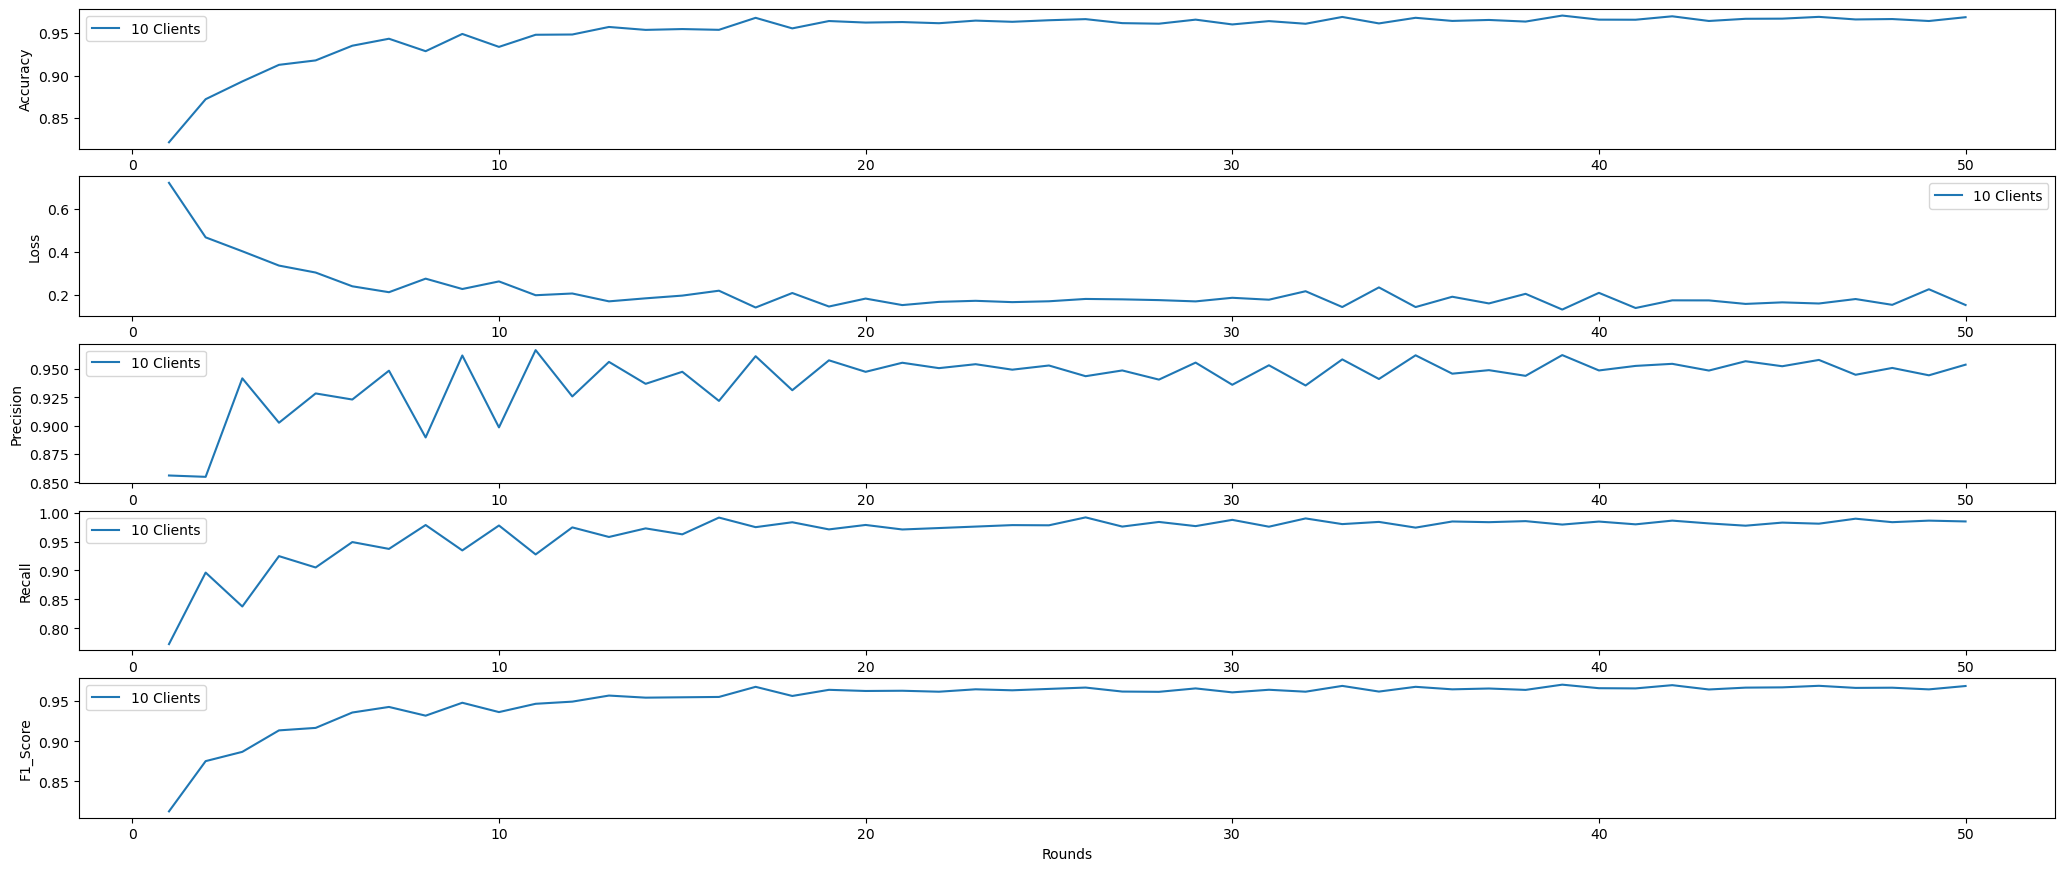

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
x = [i for i in range(1,51)]

print("Number of Rounds: ", 50)

fig, axs = plt.subplots(5)
fig.set_size_inches(25.5, 10.5)


# sns.lineplot(x=x,y=results[3]['accuracy'], ax=axs[0], legend='brief', label="3 Clients")
# sns.lineplot(x=x,y=results[5]['accuracy'], ax=axs[0], legend='brief', label="5 Clients")
sns.lineplot(x=x,y=results[10]['accuracy'], ax=axs[0], legend='brief', label="10 Clients")
axs[0].set(xlabel="Rounds", ylabel = "Accuracy")

# sns.lineplot(x=x,y=results[3]['loss'], ax=axs[1], legend='brief', label="3 Clients")
# sns.lineplot(x=x,y=results[5]['loss'], ax=axs[1], legend='brief', label="5 Clients")
sns.lineplot(x=x,y=results[10]['loss'], ax=axs[1], legend='brief', label="10 Clients")
axs[1].set(xlabel="Rounds", ylabel = "Loss")

# sns.lineplot(x=x,y=results[3]['precision'], ax=axs[2], legend='brief', label="3 Clients")
# sns.lineplot(x=x,y=results[5]['precision'], ax=axs[2], legend='brief', label="5 Clients")
sns.lineplot(x=x,y=results[10]['precision'], ax=axs[2], legend='brief', label="10 Clients")
axs[2].set(xlabel="Rounds", ylabel = "Precision")

# sns.lineplot(x=x,y=results[3]['recall'], ax=axs[3], legend='brief', label="3 Clients")
# sns.lineplot(x=x,y=results[5]['recall'], ax=axs[3], legend='brief', label="5 Clients")
sns.lineplot(x=x,y=results[10]['recall'], ax=axs[3], legend='brief', label="10 Clients")
axs[3].set(xlabel="Rounds", ylabel = "Recall")

# sns.lineplot(x=x,y=results[3]['f1_score'], ax=axs[4], legend='brief', label="3 Clients")
# sns.lineplot(x=x,y=results[5]['f1_score'], ax=axs[4], legend='brief', label="5 Clients")
sns.lineplot(x=x,y=results[10]['f1_score'], ax=axs[4], legend='brief', label="10 Clients")
axs[4].set(xlabel="Rounds", ylabel = "F1_Score")

In [46]:
max_acc=max(results[5]['accuracy'])
print(max_acc)

max_precision=max(results[5]['precision'])
print(max_precision)

max_recall=max(results[5]['recall'])
print(max_recall)

max_f1_score=max(results[5]['f1_score'])
print(max_f1_score)

0.9725333452224731
0.9713803292528493
0.9892638036809815
0.9726736088081184
